# Problem 1 (Q-learning)

*OpenAI gym FrozenLake environment*

Winter is here. You and your friends were tossing around a frisbee at the park
    when you made a wild throw that left the frisbee out in the middle of the lake.
    The water is mostly frozen, but there are a few holes where the ice has melted.
    If you step into one of those holes, you'll fall into the freezing water.
    At this time, there's an international frisbee shortage, so it's absolutely imperative that
    you navigate across the lake and retrieve the disc.
    However, the ice is slippery, so you won't always move in the direction you intend.
    The surface is described using a grid like the following

        SFFF
        FHFH
        FFFH
        HFFG

    S : starting point, safe
    F : frozen surface, safe
    H : hole, fall to your doom
    G : goal, where the frisbee is located

    The episode ends when you reach the goal or fall in a hole.
    You receive a reward of 1 if you reach the goal, and zero otherwise.
    
    FrozenLake-v0 defines "solving" as getting average reward of 0.78 over 100 consecutive trials.



In [1]:
## DO NOT CHANGE THIS CELL
import numpy as np
import gym
print("gym version", gym.__version__)
# env=gym.make('FrozenLake-v0')
env=gym.make('FrozenLake-v1')

gym version 0.26.2


For proper accounting rewards while you learn, we build a wrapper around env.step() and env.reset(). In an episode, every time you take an action the reward will be appended to the reward of the episode, and when ever the environment is reset (at the end of an epsiode), the episode reward is reset to 0. 

In [2]:
## DO NOT CHANGE THIS CELL
#wrapper for accounting rewards
rEpisode=0
rList=[]

def reset_decorate(func):
    def func_wrapper():
        global rList
        global rEpisode
        rList.append(rEpisode)
        rEpisode=0
        return(func())
    return func_wrapper

env.reset = reset_decorate(env.reset)

def step_decorate(func):
    def func_wrapper(action):
        global rEpisode
        s1, r, d, *other = func(action)  # [changed] other > *other due to gym version 0.26.2
        rEpisode+=r
        return(s1, r, d, *other)  # [changed] other > *other due to gym version 0.26.2
    return func_wrapper

env.step = step_decorate(env.step)

def init():
    rEpisode=0
    rList=[]
    return

In [3]:
## DO NOT CHANGE THIS CELL
# PLOTTING functions
from numpy import convolve, ones
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'valid')
from pylab import plot
%matplotlib inline 

Below we illustrate the execution of the Open AI gym enviornment using the policy of chosing random action in every state. Every time an action is taken the enviorment returns a tuple containing next state, reward, and the status (whether terminal state is reached or not). 

/home/simonjisu/.local/share/virtualenvs/rl_2023spring-FuEMe-5O/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


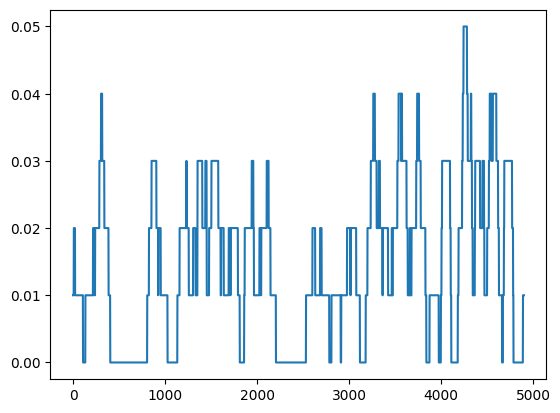

In [4]:
## DO NOT CHANGE THIS CELL
### RANDOM SAMPLING EXAMPLE
num_episodes=5000; #number of episodes you want to try
episode_max_length=100; #you can explicitly end the epsiode before terminal state is reached

env.reset()
#env.render()
#execute in episodes
for i in range(num_episodes):
    d = False #not done
    #rFinal=0
    for t in range(episode_max_length):
        
        ################ Random action policy ###########################
        #play random action 
        a = env.action_space.sample()
        #get new state, reward, done
        s, r, d, *_ = env.step(a)   # [changed] _ > *_ due to gym version 0.26.2
        #################################################################

        #break if done, reached terminal state 
        if d == True:
            break
    #reset the environment for the next episode
    s = env.reset()

rm=movingaverage(rList, 100)
plot(rm)
rEpisode=0
rList=[]

Implement tabular Q-learning (*YOU SHOULD ONLY CHANGE THE CELL BELOW*)

In [8]:
## CHANGE THIS CELL BY YOURSELF
###ALWAYS DO RUN ALL CELLS, otherwise some structures may not get initialized properly

# --------------------------------Just like to check the average success rate---------------------------------
import time
from tqdm import tqdm

# def select_action(Q, s, epsilon):
#     if np.max(Q[s]) > 0:
#         # epsilon-greedy
#         if np.random.uniform(0, 1) < epsilon:
#             a = env.action_space.sample()
#         else:
#             a = np.argmax(Q[s])
#     else:
#         a = env.action_space.sample()
#     return a

# def run_experiments(exp_num, max_eps=1.0, min_eps=0.001, decay_rate=0.005):
#     rEpisode=0
#     rList=[]

#     #initialize episodic structure
#     num_episodes=5000
#     episode_max_length=100

#     #initialize discount factor, learning rate
#     gamma=0.95
#     learnRate=0.8

#     #create Q table
#     Q=np.zeros([env.observation_space.n, env.action_space.n]) #matrix Q[s,a]

#     n_cussess = 0
#     global_logger = tqdm(total=num_episodes, leave=False)
#     #execute in episodes
#     for i in range(num_episodes):
        
#         #reset the environment at the beginning of an episode
#         s, _ = env.reset()  # [changed] s > s, prob due to gym version 0.26.2
#         d = False #not done
        
#         # epsilon decay
#         epsilon = min_eps + (max_eps - min_eps)*np.exp(-decay_rate*i) 
#         global_logger.set_description(f'[Exp{exp_num+1:03}] epsilon={epsilon:.6f}')

#         for t in range(episode_max_length):
#             ###########SELCT ACTION a for state s using Q-values ##############
#             a = select_action(Q, s, epsilon)

#             #get new state, reward, done
#             s1, r, d, *_ = env.step(a)  # [changed] _ > *_ due to gym version 0.26.2

#             ##### update Q(s,a) #####
#             Q[s, a] = Q[s, a] + learnRate * (r + gamma * np.max(Q[s1]) - Q[s, a])

#             #break if done, reached terminal state 
#             if d == True:
                
#                 break
#             s=s1
#         n_cussess += r
#         global_logger.update(1)
#     global_logger.close()

#     return Q, n_cussess / num_episodes * 100

# Qs = []
# exps = []
# num_exps = 10
# max_eps=1.0 
# min_eps=0.001
# decay_rate=0.0075
# for exp_num in range(num_exps):
#     Q, success = run_experiments(exp_num)
#     Qs.append(Q)
#     exps.append(success)

# ---------------------------------Use last run to check if over the criterion--------------------------------------
def select_action(Q, s, epsilon):
    if np.max(Q[s]) > 0:
        # epsilon-greedy
        if np.random.uniform(0, 1) < epsilon:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[s])
    else:
        a = env.action_space.sample()
    return a


rEpisode=0
rList=[]

#initialize episodic structure
num_episodes=5000
episode_max_length=100

#initialize discount factor, learning rate
gamma=0.95
learnRate=0.8
max_eps = 1.0
min_eps = 0.001
decay_rate = 0.005
#create Q table
Q=np.zeros([env.observation_space.n, env.action_space.n]) #matrix Q[s,a]

n_cussess = 0
global_logger = tqdm(total=num_episodes, leave=True)
#execute in episodes
for i in range(num_episodes):
    
    #reset the environment at the beginning of an episode
    s, _ = env.reset()  # [changed] s > s, prob due to gym version 0.26.2
    d = False #not done
    
    # epsilon decay
    epsilon = min_eps + (max_eps - min_eps)*np.exp(-decay_rate*i) 
    global_logger.set_description(f'[Last] epsilon={epsilon:.6f}')
    for t in range(episode_max_length):
        ###########SELCT ACTION a for state s using Q-values ##############
        a = select_action(Q, s, epsilon)

        #get new state, reward, done
        s1, r, d, *_ = env.step(a)  # [changed] _ > *_ due to gym version 0.26.2


        ##### update Q(s,a) #####
        Q[s, a] = Q[s, a] + learnRate * (r + gamma * np.max(Q[s1]) - Q[s, a])

    
        #break if done, reached terminal state 
        if d == True:
            
            break
        s=s1
    n_cussess += r
    global_logger.update(1)
global_logger.close()

time.sleep(1)
# print(f'Number of experiments={num_exps} Average {np.mean(exps):.2f} +/- {np.std(exps):.2f}% of episodes were successful')
print(f'Last run {n_cussess / num_episodes * 100:.2f} % of episodes were successful')

[Last] epsilon=0.001000: 100%|██████████| 5000/5000 [00:11<00:00, 434.72it/s]  


Number of experiments=10 Average 55.82 +/- 1.57% of episodes were successful
Last run 58.46 % of episodes were successful


plot moving average over 100 episodes

Solved after 1445 episodes.


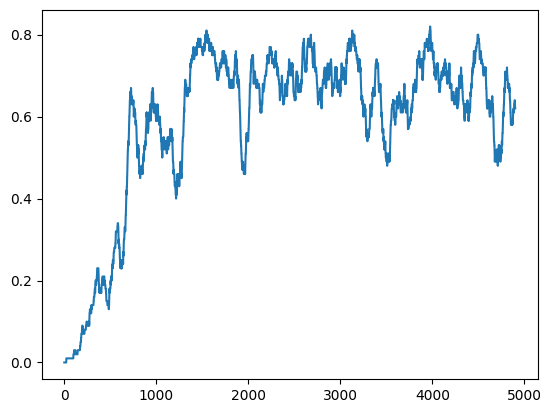

In [9]:
## DO NOT CHANGE THIS CELL
rm=movingaverage(rList, 100)
plot(rm)
criterion = len(np.where(rm >= .78)[0]) >0
if criterion:
    print("Solved after %d episodes." % np.where(rm >= .78)[0][0])
else:
    print("Unsolved Yet!")

# Problem 2 (SARSA)
Implement tabular SARSA (*YOU SHOULD ONLY CHANGE THE CELL BELOW*)

In [26]:
## CHANGE THIS CELL BY YOURSELF
###ALWAYS RUN ALL CELLS, otherwise some structures may not get initialized properly

# def select_action(pi, s, epsilon):
#     # epsilon-greedy
#     if np.random.uniform(0, 1) < epsilon:
#         a = env.action_space.sample()
#     else:
#         a = pi[s]
#     return a
def select_action(Q, s, epsilon):
    if np.max(Q[s]) > 0:
        # epsilon-greedy
        if np.random.uniform(0, 1) < epsilon:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[s])
    else:
        a = env.action_space.sample()
    return a

rEpisode=0
rList=[]
#initialize episodic structure
num_episodes=5000
episode_max_length=100

#initialize discount factor, learning rate
gamma=0.95
learnRate=0.8
max_eps=1.0 
min_eps=0.001
decay_rate=0.0075

#create Q table
Q=np.zeros([env.observation_space.n,env.action_space.n]) #matrix Q[s,a]
#create policy 
pi=np.random.randint(low=env.action_space.n, size=env.observation_space.n) #array pi[s]
#execute in episodes
n_cussess = 0
global_logger = tqdm(total=num_episodes, leave=True)
for i in range(num_episodes):
    
    #reset the environment at the beginning of an episode
    s, _ = env.reset()  # [changed] s > s, prob due to gym version 0.26.2
    d = False #not done
    
    # epsilon decay
    epsilon = min_eps + (max_eps - min_eps)*np.exp(-decay_rate*i) 
    global_logger.set_description(f'[Last] epsilon={epsilon:.6f}')
    
    # action selection
    a = select_action(Q, s, epsilon)
    for t in range(episode_max_length):
        
        ###########SELCT ACTION a for state  using current policy ##################   
        # a = select_action(pi, s, epsilon)
        

        # get new state, reward, done
        s1, r, d, *_ = env.step(a)  # [changed] _ > *_ due to gym version 0.26.2

        # select next action a1
        # a1 = select_action(pi, s1, epsilon)
        a1 = select_action(Q, s1, epsilon)

        ##### update Q(s,a) ############
        # SARSA
        Q[s, a] = Q[s, a] + learnRate * (r + gamma * Q[s1, a1] - Q[s, a])
        
              
        #break if done, reached terminal state 
        if d == True:
            break
        s=s1
        a=a1
    
    #### improve policy pi
    #should not do this after every episode
    # pi=np.random.randint(low=env.action_space.n, size=env.observation_space.n) 
    #replace by policy improvement
    # pi= np.argmax(Q, axis=1)
    
    n_cussess += r
    global_logger.update(1)
global_logger.close()

time.sleep(1)
print(f'Last run {n_cussess / num_episodes * 100:.2f} % of episodes were successful')

[Last] epsilon=0.001000: 100%|██████████| 5000/5000 [00:10<00:00, 498.21it/s]


Last run 57.44 % of episodes were successful


Solved after 2714 episodes.


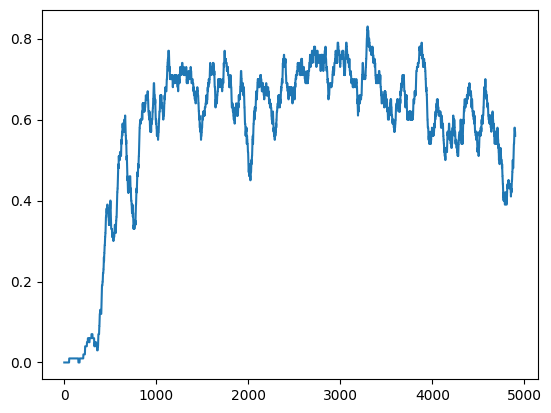

In [27]:
## DO NOT CHANGE THIS CELL
rm=movingaverage(rList, 100)
plot(rm)
criterion = len(np.where(rm >= .78)[0]) >0
if criterion:
    print("Solved after %d episodes." % np.where(rm >= .78)[0][0])
else:
    print("Unsolved Yet!")

Run all the code in order.\
Save the notebook file.\
Upload on eTL.